# Aus Bank Data exploratory data analysis  
Going to be looking at:
- CommBank (CBA)
- Westpac (WBC)
- ANZ (ANZ)
- NAB (NAB)
- Macquarie Bank (MQG)

These are the big 4 banks in Australia as well as MQG. Aim is to explore the data, look at relationships and trends, as well as the correlation in the data, using python's statistical and visual libraries.

# Content
- Setting up Dataframe
- Analysing Price Data 
- Analysing Returns Data 
- Correlation between banks prices and returns 

### Setting up the dataframe 

In [9]:
# First importing libraries needed. 
from pandas_datareader import data, wb
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime 
%matplotlib inline 

In [10]:
# Set start and end time for bank data 
start_date = datetime.datetime(2007,1,1)
end_date = datetime.datetime(2020,5,14)

In [11]:
# Pull stock data from yahoo finance using python datareader 

#CommBank
CBA = data.DataReader('CBA.AX','yahoo',start_date,end_date)

#Westpack
WBC = data.DataReader('WBC.AX','yahoo',start_date,end_date)

#ANZ
ANZ = data.DataReader('ANZ.AX','yahoo',start_date,end_date)

#NAB
NAB = data.DataReader('NAB.AX','yahoo',start_date,end_date)

#Macquarie Bank 
MQG = data.DataReader('MQG.AX','yahoo',start_date,end_date)


In [12]:
# Also created a list of tickers to be used when analysing the data 
tickers = ['CBA','WBC','ANZ','NAB','MQG']

In [13]:
# Each individual bank df looks like this:
CBA.head()
# The close price will predominantly be used for analysis

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-01,49.601299,49.113899,49.123901,49.432201,1323478.0,23.196098
2007-01-02,49.680801,49.272999,49.680801,49.312801,1374559.0,23.140064
2007-01-03,49.312801,48.736000,49.233200,48.736000,1397582.0,22.869408
2007-01-04,49.143700,48.139198,48.736000,48.477299,1357604.0,22.748011
2007-01-07,48.835400,48.179001,48.338100,48.407700,1988898.0,22.715347


In [14]:
# Next all bank data is concatenated into one dataframe 
df = pd.concat([CBA,WBC,ANZ,NAB,MQG],axis=1,keys=tickers)

In [15]:
# Naming the columns 
df.columns.names=['Tickers','Stock info']
df.head()

Tickers           CBA                                                         \
Stock info       High        Low       Open      Close     Volume  Adj Close   
Date                                                                           
2007-01-01  49.601299  49.113899  49.123901  49.432201  1323478.0  23.196098   
2007-01-02  49.680801  49.272999  49.680801  49.312801  1374559.0  23.140064   
2007-01-03  49.312801  48.736000  49.233200  48.736000  1397582.0  22.869408   
2007-01-04  49.143700  48.139198  48.736000  48.477299  1357604.0  22.748011   
2007-01-07  48.835400  48.179001  48.338100  48.407700  1988898.0  22.715347   

Tickers           WBC                                   ...        NAB  \
Stock info       High        Low       Open      Close  ...       Open   
Date                                                    ...              
2007-01-01  24.125700  23.966801  24.086000  24.056200  ...  38.488899   
2007-01-02  24.135700  23.887400  24.086000  23.956900  ...  39.002602   
2007-01-03  24.086000  23.837700  23.837700  23.847700  ...  38.251099   
2007-01-04  24.046301  23.609301  23.976801  23.639099  ...  38.146400   
2007-01-07  23.619200  23.212000  23.589399  23.321199  ...  37.813499   

Tickers                                            MQG                        \
Stock info      Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2007-01-01  38.679100  1142391.0  16.224546  79.166000  77.799103  77.799103   
2007-01-02  38.526901  2084311.0  16.160704  78.802200  76.805801  78.674301   
2007-01-03  38.060799  3111998.0  15.965194  78.330101  76.215797  78.330101   
2007-01-04  38.051300  2170773.0  15.961202  77.356499  76.117401  77.199203   
2007-01-07  37.813499  2874352.0  15.861458  76.707497  74.298103  76.707497   

Tickers                                     
Stock info      Close    Volume  Adj Close  
Date                                        
2007-01-01  78.330101  533634.0  39.179394  
2007-01-02  77.690903  523735.0  38.859680  
2007-01-03  76.215797  680773.0  38.121864  
2007-01-04  76.707497  668049.0  38.367798  
2007-01-07  74.484901  663689.0  37.256088  

[5 rows x 30 columns]

### Analysing the price data 

In [18]:
# Highest prices and on what day
df.xs(key='Close',axis=1,level='Stock info').max()

Tickers
CBA     95.800903
WBC     39.620300
ANZ     37.189999
NAB     42.655499
MQG    151.770004
dtype: float64

In [19]:
df.xs(key='Close',axis=1,level='Stock info').idxmax()

Tickers
CBA   2015-03-19
WBC   2015-03-24
ANZ   2015-03-24
NAB   2007-11-13
MQG   2020-02-19
dtype: datetime64[ns]

In [20]:
# Lowest Prices and on what day
df.xs(key='Close',axis=1,level='Stock info').min()

Tickers
CBA    23.9403
WBC    14.1000
ANZ    11.8900
NAB    13.8800
MQG    15.4890
dtype: float64

In [21]:
df.xs(key='Close',axis=1,level='Stock info').idxmin()

Tickers
CBA   2009-01-22
WBC   2020-03-22
ANZ   2009-02-11
NAB   2020-03-22
MQG   2009-03-01
dtype: datetime64[ns]

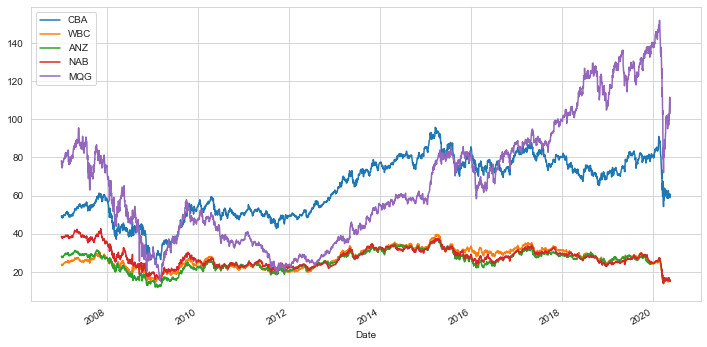

In [23]:
# Lineplots
sns.set_style('whitegrid')
for name in tickers:
    df[name]['Close'].plot(label=name,figsize=(12,6))
plt.legend()

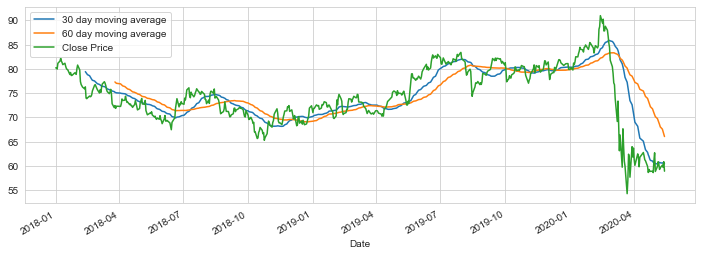

In [24]:
# Moving Averages of stocks since start of 2018
# E.g. CBA and MQG
plt.figure(figsize=(12,4))
CBA['Close']['2018-01-01':'2020-05-14'].rolling(window=30).mean().plot(label='30 day moving average')
CBA['Close']['2018-01-01':'2020-05-14'].rolling(window=60).mean().plot(label='60 day moving average')
CBA['Close']['2018-01-01':'2020-05-14'].plot(label='Close Price')
plt.legend()


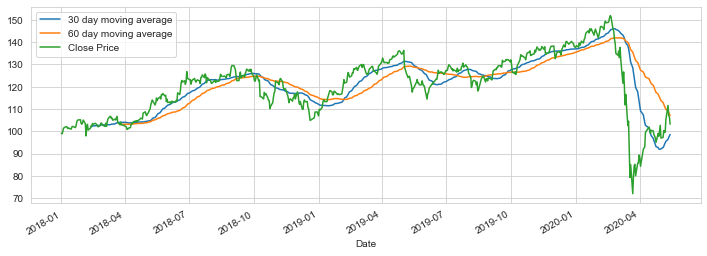

In [25]:
plt.figure(figsize=(12,4))
MQG['Close']['2018-01-01':'2020-05-14'].rolling(window=30).mean().plot(label='30 day moving average')
MQG['Close']['2018-01-01':'2020-05-14'].rolling(window=60).mean().plot(label='60 day moving average')
MQG['Close']['2018-01-01':'2020-05-14'].plot(label='Close Price')
plt.legend()

### Analysing returns data 

In [26]:
# Creating returns DataFrame 
returns_data=pd.DataFrame()

In [27]:
for bank in tickers:
    returns_data[bank+' Return']=df[bank]['Close'].pct_change()

In [28]:
returns_data.head()

,CBA Return,WBC Return,ANZ Return,NAB Return,MQG Return
Date,,,,,
2007-01-01,NaN,NaN,NaN,NaN,NaN
2007-01-02,-0.002415,-0.004128,0.002489,-0.003935,-0.008160
2007-01-03,-0.011697,-0.004558,0.003546,-0.012098,-0.018987
2007-01-04,-0.005308,-0.008747,-0.010601,-0.000250,0.006451
2007-01-07,-0.001436,-0.013448,-0.017500,-0.006249,-0.028975


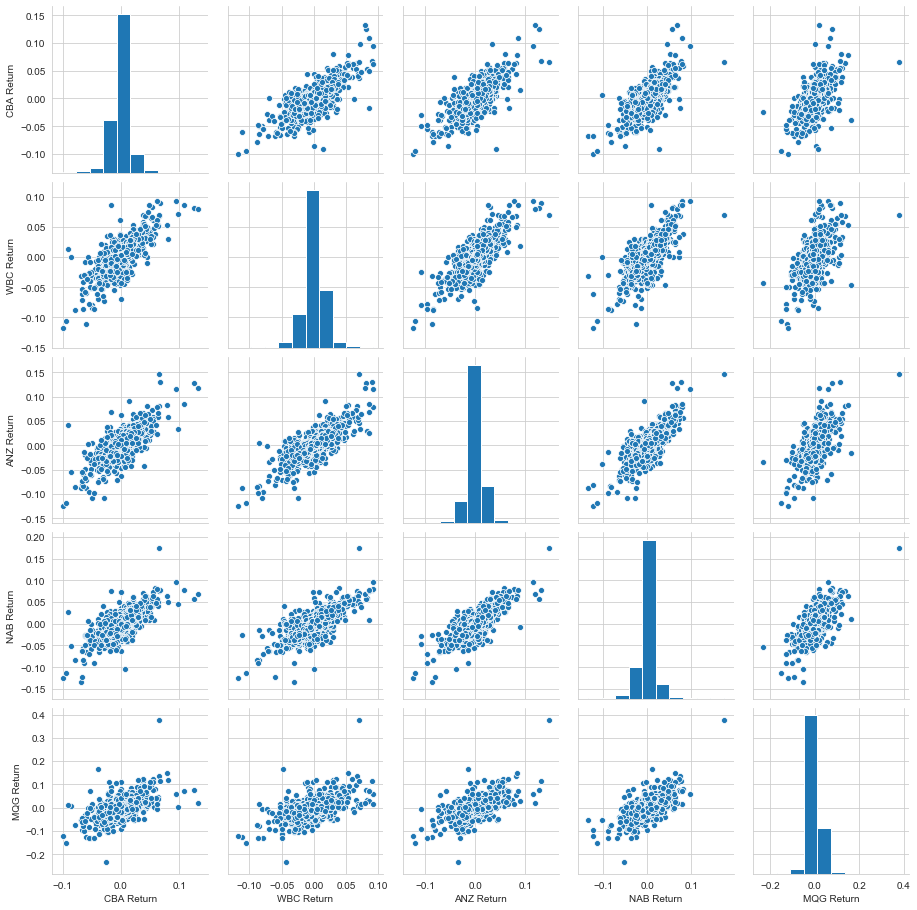

In [29]:
# relationship or returns between banks 
sns.pairplot(returns_data)

In [30]:
# Date of best and worst single day returns 
returns_data.idxmax()

CBA Return   2020-03-16
WBC Return   2020-03-24
ANZ Return   2008-09-19
NAB Return   2008-09-19
MQG Return   2008-09-19
dtype: datetime64[ns]

In [31]:
returns_data.idxmin()

CBA Return   2020-03-15
WBC Return   2020-03-15
ANZ Return   2020-03-15
NAB Return   2008-07-25
MQG Return   2008-09-18
dtype: datetime64[ns]

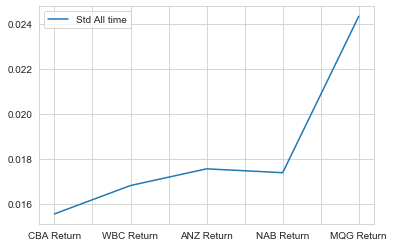

In [32]:
# Risk levels of returns 
returns_data.std().plot(label='Std All time',legend=True)

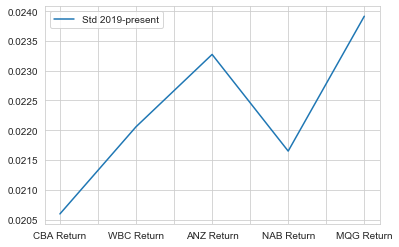

In [33]:
# Risk levels since beginning of 2019
returns_data['2019-01-01':'2020-05-14'].std().plot(label='Std 2019-present',legend=True)

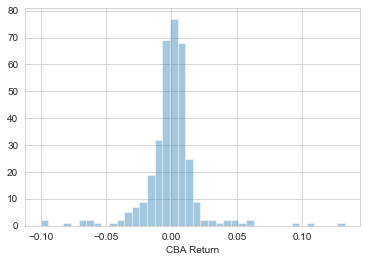

In [34]:
# Distributions of returns 2019-present 
sns.distplot(returns_data['2019-01-01':'2020-05-14']['CBA Return'],bins=40,kde=False)

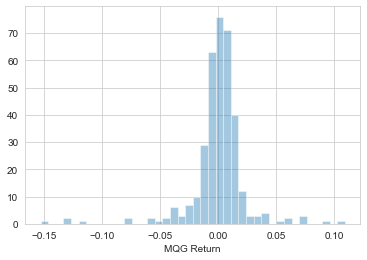

In [35]:
sns.distplot(returns_data['2019-01-01':'2020-05-14']['MQG Return'],bins=40,kde=False)

### Correlation

In [36]:
# Correlation of returns 
returns_data_corr = returns_data.corr()
returns_data_corr.head()

,CBA Return,WBC Return,ANZ Return,NAB Return,MQG Return
CBA Return,1.000000,0.778440,0.757208,0.744555,0.563956
WBC Return,0.778440,1.000000,0.804471,0.760548,0.579906
ANZ Return,0.757208,0.804471,1.000000,0.801109,0.617907
NAB Return,0.744555,0.760548,0.801109,1.000000,0.649555
MQG Return,0.563956,0.579906,0.617907,0.649555,1.000000


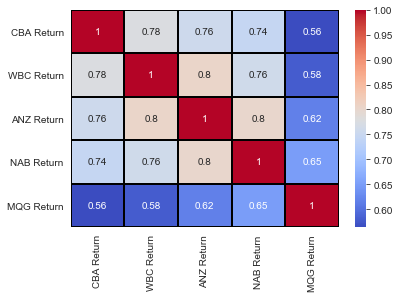

In [37]:
sns.heatmap(returns_data_corr,annot=True,cmap='coolwarm',linewidths=1,linecolor='black')

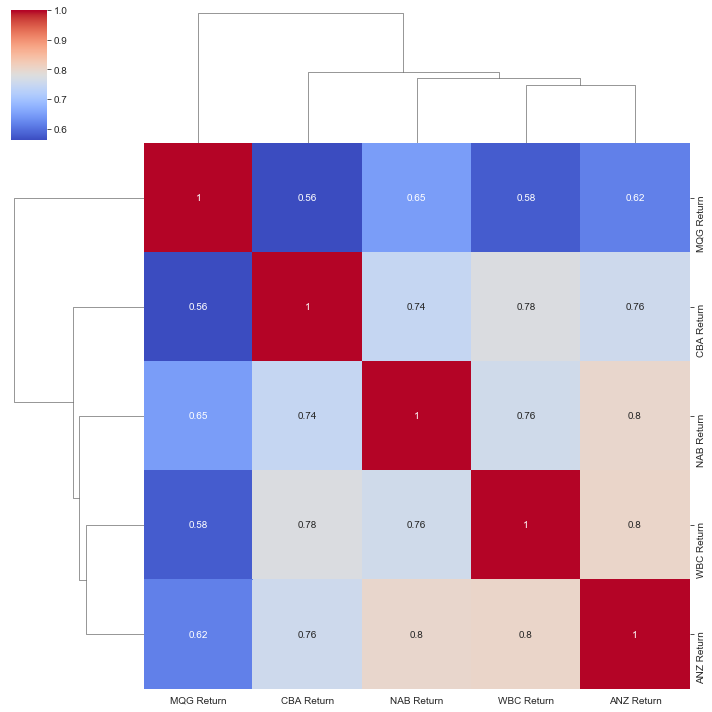

In [38]:
sns.clustermap(returns_data_corr,cmap='coolwarm',annot=True)

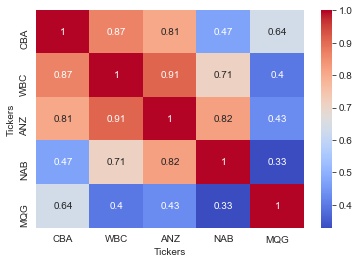

In [39]:
# Correlation of Price Changes 
df_close_corr = df.xs(key='Close',axis=1,level='Stock info').corr()
sns.heatmap(df_close_corr,cmap='coolwarm',annot=True)

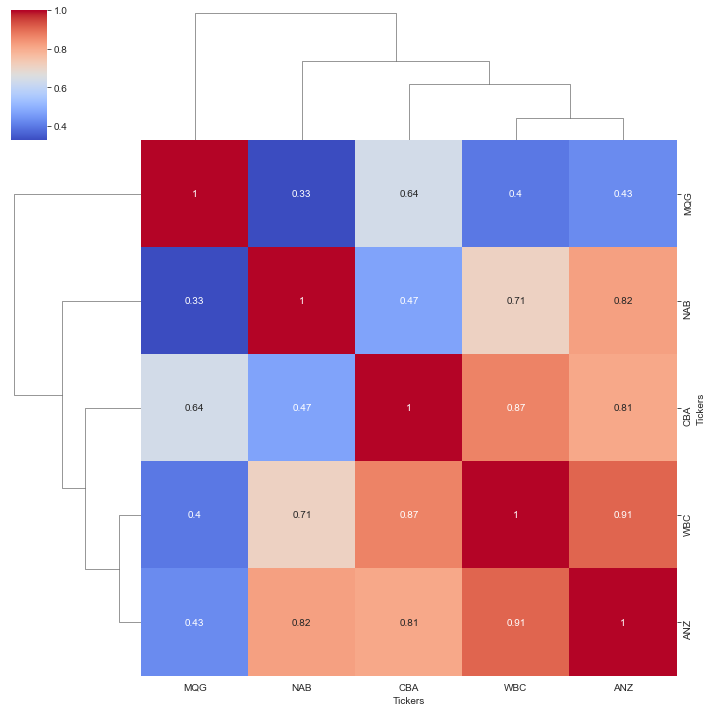

In [40]:
sns.clustermap(df_close_corr,cmap='coolwarm',annot=True)